<a href="https://colab.research.google.com/github/vasan145/ML-PROJECTS/blob/main/PRE_PROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df= pd.read_csv('/content/preprocessing_dataset.csv')
df

,Name,Age,Gender,Salary,Department
0,Alice,25.0,F,50000.0,HR
1,Bob,30.0,M,60000.0,Finance
2,Charlie,NaN,M,55000.0,IT
3,David,40.0,M,58000.0,HR
4,Eve,22.0,F,52000.0,IT
5,Frank,35.0,NaN,61000.0,Finance
6,Grace,120.0,F,NaN,Finance
7,Henry,28.0,M,59000.0,HR
8,Ivy,29.0,F,63000.0,IT
9,Jack,27.0,M,62000.0,Finance


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        10 non-null     object 
 1   Age         9 non-null      float64
 2   Gender      9 non-null      object 
 3   Salary      9 non-null      float64
 4   Department  10 non-null     object 
dtypes: float64(2), object(3)
memory usage: 532.0+ bytes


In [ ]:
df.isnull().sum()

,0
Name,0
Age,1
Gender,1
Salary,1
Department,0


<Axes: >

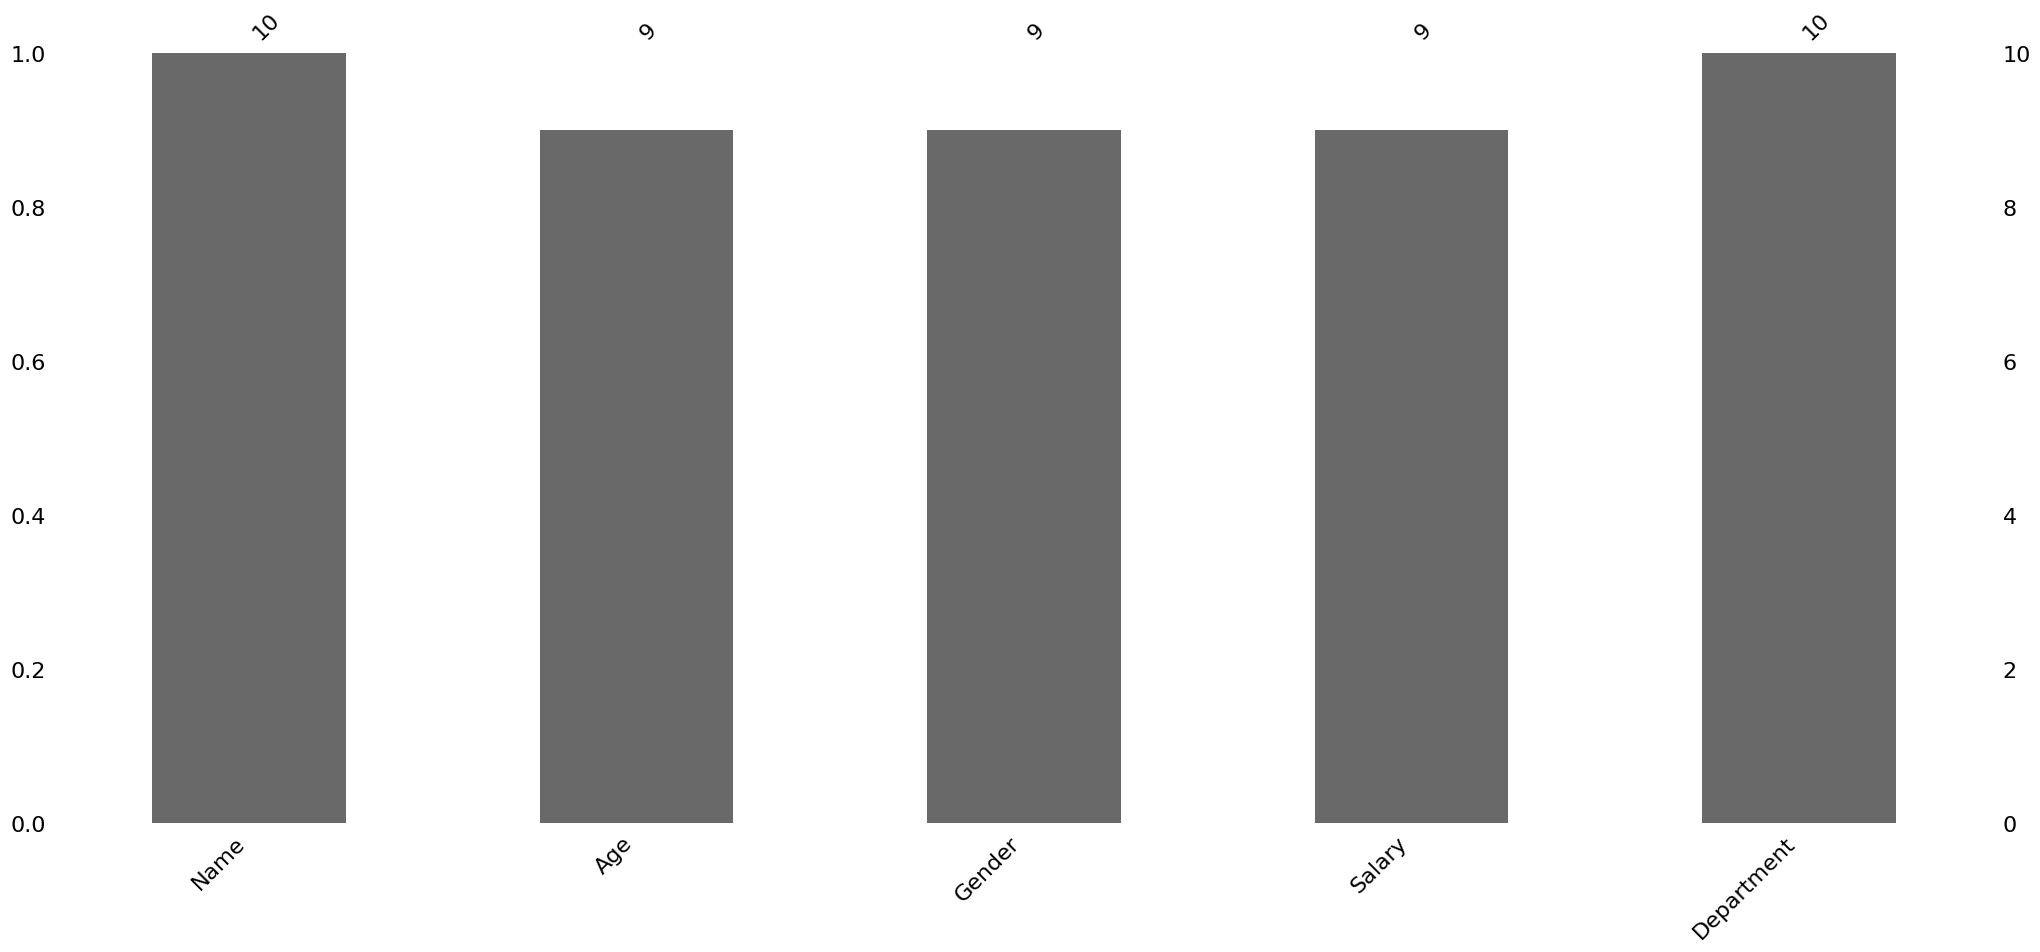

In [ ]:
!pip install missingno
import missingno as msno
msno.bar(df)

<Axes: >

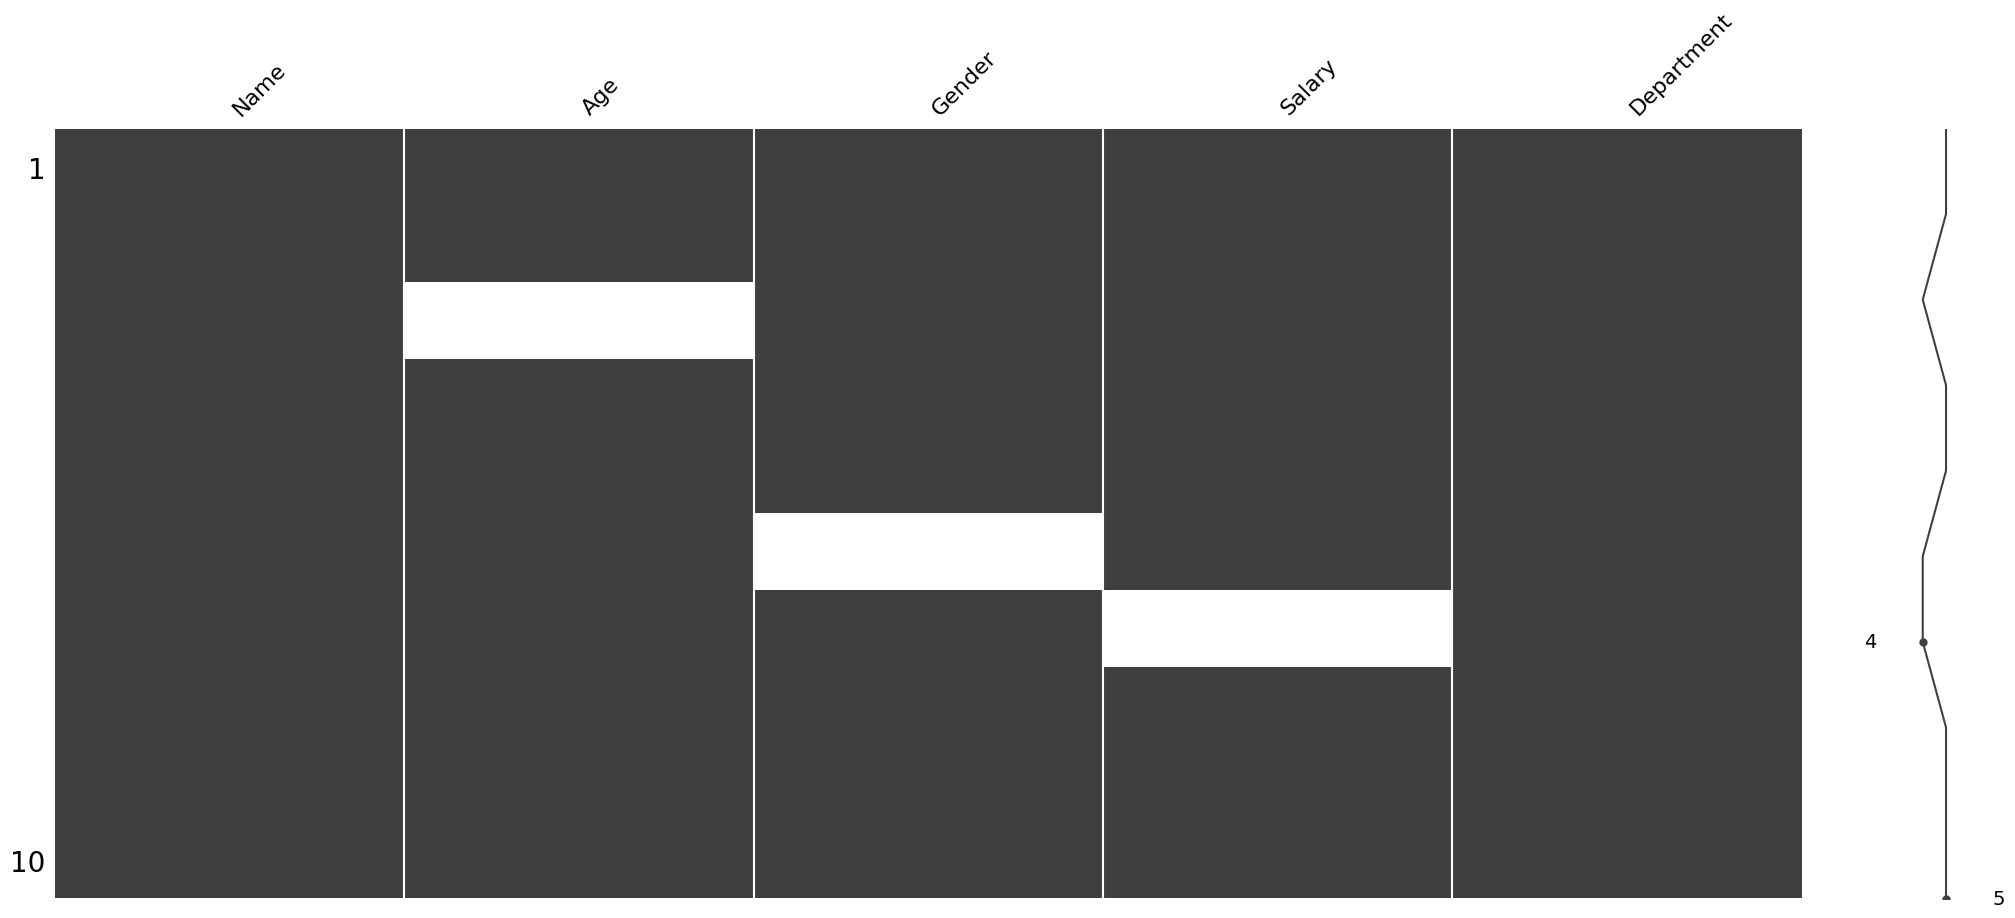

In [ ]:
msno.matrix(df)

<Axes: >

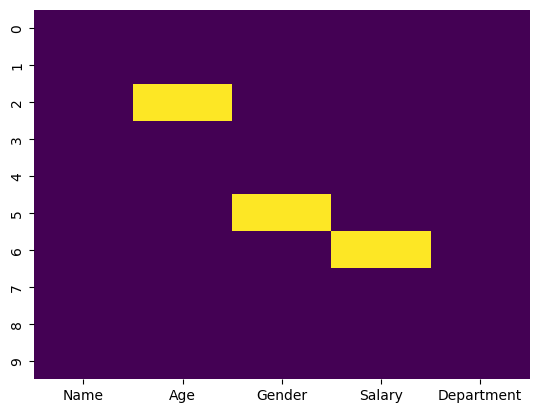

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [ ]:
#to delete the missing value
# df.dropna(inplace=True)
# df

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Salary'].fillna(df['Salary'].median(),inplace=True)
df['Gender'].fillna(df['Gender'].mode(),inplace=True)
df

,Name,Age,Gender,Salary,Department
0,Alice,25.000000,F,50000.0,HR
1,Bob,30.000000,M,60000.0,Finance
2,Charlie,39.555556,M,55000.0,IT
3,David,40.000000,M,58000.0,HR
4,Eve,22.000000,F,52000.0,IT
5,Frank,35.000000,NaN,61000.0,Finance
6,Grace,120.000000,F,59000.0,Finance
7,Henry,28.000000,M,59000.0,HR
8,Ivy,29.000000,F,63000.0,IT
9,Jack,27.000000,M,62000.0,Finance


In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
df['Age']=imp.fit_transform(df[['Age']])
df

,Name,Age,Gender,Salary,Department
0,Alice,25.000000,F,50000.0,HR
1,Bob,30.000000,M,60000.0,Finance
2,Charlie,39.555556,M,55000.0,IT
3,David,40.000000,M,58000.0,HR
4,Eve,22.000000,F,52000.0,IT
5,Frank,35.000000,NaN,61000.0,Finance
6,Grace,120.000000,F,59000.0,Finance
7,Henry,28.000000,M,59000.0,HR
8,Ivy,29.000000,F,63000.0,IT
9,Jack,27.000000,M,62000.0,Finance


OUTLIERS

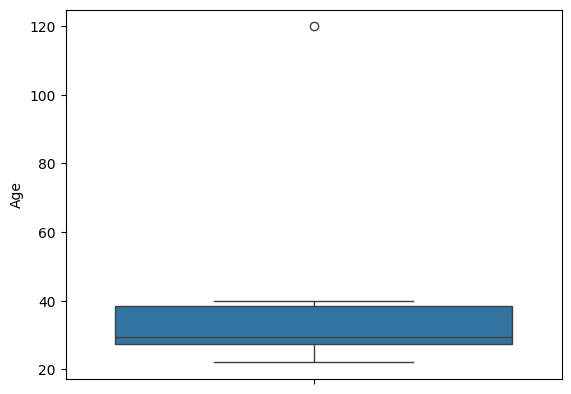

In [ ]:
import matplotlib.pyplot as plt
sns.boxplot(df['Age'])
plt.show()


In [ ]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1- 1.5*IQR
upper_bound=Q3+ 1.5*IQR

outliers=df[(df['Age']<lower_bound) | (df['Age']>upper_bound)]
outliers



,Name,Age,Gender,Salary,Department
6,Grace,120.0,F,59000.0,Finance


Z SCORE

In [ ]:
from scipy.stats import zscore
import numpy as np
z_scores=zscore(df['Age'])
df[np.abs(z_scores)>2.5]

,Name,Age,Gender,Salary,Department
6,Grace,120.0,F,59000.0,Finance


In [ ]:
from sklearn.ensemble import IsolationForest
iso= IsolationForest(contamination=0.01)
df['outliers']=iso.fit_predict(df[['Age','Salary']])
df[df['outliers']==-1]

,Name,Age,Gender,Salary,Department,outliers
6,Grace,120.0,F,59000.0,Finance,-1


to handle outliers

In [ ]:
df['Age']=np.where(df['Age']>100,df['Age'].median(),df['Age'])
df

,Name,Age,Gender,Salary,Department,outliers
0,Alice,25.000000,F,50000.0,HR,1
1,Bob,30.000000,M,60000.0,Finance,1
2,Charlie,39.555556,M,55000.0,IT,1
3,David,40.000000,M,58000.0,HR,1
4,Eve,22.000000,F,52000.0,IT,1
5,Frank,35.000000,NaN,61000.0,Finance,1
6,Grace,29.500000,F,59000.0,Finance,-1
7,Henry,28.000000,M,59000.0,HR,1
8,Ivy,29.000000,F,63000.0,IT,1
9,Jack,27.000000,M,62000.0,Finance,1


ENCODEING

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender_encoded']=le.fit_transform(df['Gender'])
df

,Name,Age,Gender,Salary,Department,outliers,Gender_encoded
0,Alice,25.000000,F,50000.0,HR,1,0
1,Bob,30.000000,M,60000.0,Finance,1,1
2,Charlie,39.555556,M,55000.0,IT,1,1
3,David,40.000000,M,58000.0,HR,1,1
4,Eve,22.000000,F,52000.0,IT,1,0
5,Frank,35.000000,NaN,61000.0,Finance,1,2
6,Grace,29.500000,F,59000.0,Finance,-1,0
7,Henry,28.000000,M,59000.0,HR,1,1
8,Ivy,29.000000,F,63000.0,IT,1,0
9,Jack,27.000000,M,62000.0,Finance,1,1


GET DUMMIES

In [ ]:
df= pd.get_dummies(df,columns=['Department'],drop_first=True)
df

,Name,Age,Gender,Salary,outliers,Gender_encoded,Department_HR,Department_IT
0,Alice,25.000000,F,50000.0,1,0,True,False
1,Bob,30.000000,M,60000.0,1,1,False,False
2,Charlie,39.555556,M,55000.0,1,1,False,True
3,David,40.000000,M,58000.0,1,1,True,False
4,Eve,22.000000,F,52000.0,1,0,False,True
5,Frank,35.000000,NaN,61000.0,1,2,False,False
6,Grace,29.500000,F,59000.0,-1,0,False,False
7,Henry,28.000000,M,59000.0,1,1,True,False
8,Ivy,29.000000,F,63000.0,1,0,False,True
9,Jack,27.000000,M,62000.0,1,1,False,False


one hot encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=  OneHotEncoder(sparse_output=False)
df['Gender_encoded']=ohe.fit_transform(df[['Gender']])
df

,Name,Age,Gender,Salary,outliers,Gender_encoded,Department_HR,Department_IT
0,Alice,25.000000,F,50000.0,1,1.0,True,False
1,Bob,30.000000,M,60000.0,1,0.0,False,False
2,Charlie,39.555556,M,55000.0,1,0.0,False,True
3,David,40.000000,M,58000.0,1,0.0,True,False
4,Eve,22.000000,F,52000.0,1,1.0,False,True
5,Frank,35.000000,NaN,61000.0,1,0.0,False,False
6,Grace,29.500000,F,59000.0,-1,1.0,False,False
7,Henry,28.000000,M,59000.0,1,0.0,True,False
8,Ivy,29.000000,F,63000.0,1,1.0,False,True
9,Jack,27.000000,M,62000.0,1,0.0,False,False


#standardization= to bring the values into particular range(-3 to 3)
#normalization= used in the image processing(0-1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
df['Age_std']=sc.fit_transform(df[['Age']])
df['Salary_std']=sc.fit_transform(df[['Salary']])

df

,Name,Age,Gender,Salary,outliers,Gender_encoded,Department_HR,Department_IT,Age_std,Salary_std
0,Alice,25.000000,F,50000.0,1,1.0,True,False,-0.977844,-1.945435
1,Bob,30.000000,M,60000.0,1,0.0,False,False,-0.089792,0.517141
2,Charlie,39.555556,M,55000.0,1,0.0,False,True,1.607374,-0.714147
3,David,40.000000,M,58000.0,1,0.0,True,False,1.686312,0.024626
4,Eve,22.000000,F,52000.0,1,1.0,False,True,-1.510675,-1.452920
5,Frank,35.000000,NaN,61000.0,1,0.0,False,False,0.798260,0.763399
6,Grace,29.500000,F,59000.0,-1,1.0,False,False,-0.178597,0.270883
7,Henry,28.000000,M,59000.0,1,0.0,True,False,-0.445013,0.270883
8,Ivy,29.000000,F,63000.0,1,1.0,False,True,-0.267402,1.255914
9,Jack,27.000000,M,62000.0,1,0.0,False,False,-0.622623,1.009656


NORMALIZATION

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm= MinMaxScaler()
df['Age_norm']=mm.fit_transform(df[['Age']])
df['Salary_norm']=mm.fit_transform(df[['Salary']])

df

,Name,Age,Gender,Salary,outliers,Gender_encoded,Department_HR,Department_IT,Age_std,Salary_std,Age_norm,Salary_norm
0,Alice,25.000000,F,50000.0,1,1.0,True,False,-0.977844,-1.945435,0.166667,0.000000
1,Bob,30.000000,M,60000.0,1,0.0,False,False,-0.089792,0.517141,0.444444,0.769231
2,Charlie,39.555556,M,55000.0,1,0.0,False,True,1.607374,-0.714147,0.975309,0.384615
3,David,40.000000,M,58000.0,1,0.0,True,False,1.686312,0.024626,1.000000,0.615385
4,Eve,22.000000,F,52000.0,1,1.0,False,True,-1.510675,-1.452920,0.000000,0.153846
5,Frank,35.000000,NaN,61000.0,1,0.0,False,False,0.798260,0.763399,0.722222,0.846154
6,Grace,29.500000,F,59000.0,-1,1.0,False,False,-0.178597,0.270883,0.416667,0.692308
7,Henry,28.000000,M,59000.0,1,0.0,True,False,-0.445013,0.270883,0.333333,0.692308
8,Ivy,29.000000,F,63000.0,1,1.0,False,True,-0.267402,1.255914,0.388889,1.000000
9,Jack,27.000000,M,62000.0,1,0.0,False,False,-0.622623,1.009656,0.277778,0.923077
